# Part 1: Handwriting Recognition 

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Dropout, LSTM, Flatten
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


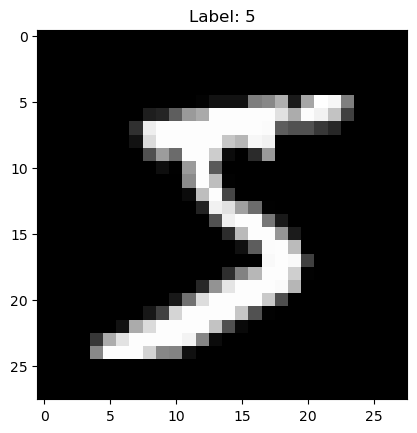

Epoch 1/5


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 713us/step - accuracy: 0.8582 - loss: 0.4852
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.9555 - loss: 0.1483
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.9664 - loss: 0.1082
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.9725 - loss: 0.0858
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 805us/step - accuracy: 0.9776 - loss: 0.0715
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.9739 - loss: 0.0884
Test accuracy: 0.9776999950408936


In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Display the first image in the training set
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

# Build a simple neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

In [8]:
from PIL import Image
import numpy as np

# Load the image
img_path = '/Users/Marika/Data Sets/imgonline-com-ua-Negative-6w9BXC0j97n.jpg'   
img = Image.open(img_path).convert('L')  # Convert the image to grayscale

# Resize the image to 28x28 pixels
newsize = (28, 28)
img_resized = img.resize(newsize)

# Convert the image to a NumPy array
testimg = np.asarray(img_resized)

# Print the shape of the array
print(f"Shape before reshaping: {testimg.shape}")

# Reshape the array to (1, 28, 28, 1) - required for model input
testimg = testimg.reshape(1, 28, 28, 1)

print(f"Shape after reshaping: {testimg.shape}")

# Normalize the pixel values to the range [0, 1]
testimg = testimg.astype('float32') / 255.0

# Predict the class
predict_value = model.predict(testimg)
digit = np.argmax(predict_value)
print(f"Predicted digit: {digit}")

Shape before reshaping: (28, 28)
Shape after reshaping: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted digit: 3


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from PIL import Image

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the dataset to have values between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build a simple neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 960us/step - accuracy: 0.8740 - loss: 0.4321 - val_accuracy: 0.9644 - val_loss: 0.1175
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9685 - loss: 0.1043 - val_accuracy: 0.9728 - val_loss: 0.0893
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - accuracy: 0.9772 - loss: 0.0731 - val_accuracy: 0.9735 - val_loss: 0.0848
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9830 - loss: 0.0541 - val_accuracy: 0.9757 - val_loss: 0.0758
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9873 - loss: 0.0403 - val_accuracy: 0.9780 - val_loss: 0.0805


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


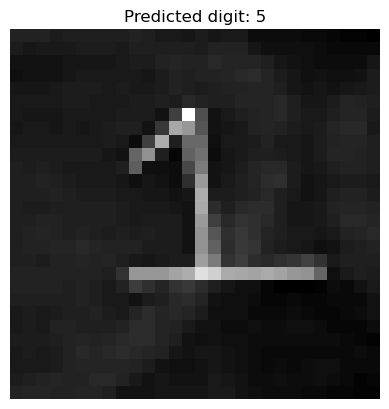

In [16]:
# Load the image you want to predict
img_path = '/Users/Marika/Data Sets/imgonline-com-ua-Negative-6w9BXC0j97n.jpg'
img = Image.open(img_path).convert('L')  # Convert to grayscale

# Resize the image to 28x28 pixels (MNIST size)
img = img.resize((28, 28))

# Convert the image to a NumPy array
img_array = np.array(img)

# Normalize the image data to match the training set
img_array = img_array.astype('float32') / 255.0

# Reshape the image to match the model's expected input shape
img_array = img_array.reshape(1, 28, 28)  # Model expects (None, 28, 28)

# Predict the digit
predict_value = model.predict(img_array)
predicted_digit = np.argmax(predict_value)

# Display the image and prediction
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted digit: {predicted_digit}")
plt.axis('off')  # Hide axes
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


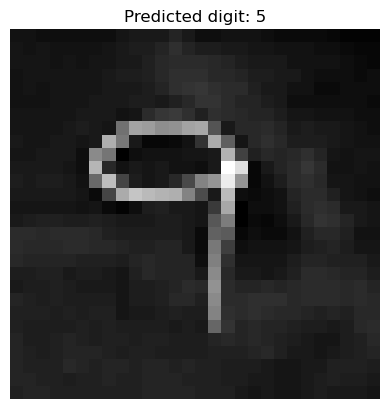

In [17]:
# Load the image you want to predict
img_path = '/Users/Marika/Data Sets/imgonline-com-ua-Negative-BcR02cPL5SUug (1).jpg'
img = Image.open(img_path).convert('L')  # Convert to grayscale

# Resize the image to 28x28 pixels (MNIST size)
img = img.resize((28, 28))

# Convert the image to a NumPy array
img_array = np.array(img)

# Normalize the image data to match the training set
img_array = img_array.astype('float32') / 255.0

# Reshape the image to match the model's expected input shape
img_array = img_array.reshape(1, 28, 28)  # Model expects (None, 28, 28)

# Predict the digit
predict_value = model.predict(img_array)
predicted_digit = np.argmax(predict_value)

# Display the image and prediction
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted digit: {predicted_digit}")
plt.axis('off')  # Hide axes
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


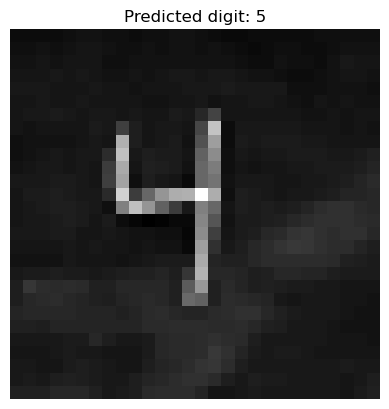

In [18]:
# Load the image you want to predict
img_path = '/Users/Marika/Data Sets/imgonline-com-ua-Negative-D07uJdOslOqGUoV.jpg'
img = Image.open(img_path).convert('L')  # Convert to grayscale

# Resize the image to 28x28 pixels (MNIST size)
img = img.resize((28, 28))

# Convert the image to a NumPy array
img_array = np.array(img)

# Normalize the image data to match the training set
img_array = img_array.astype('float32') / 255.0

# Reshape the image to match the model's expected input shape
img_array = img_array.reshape(1, 28, 28)  # Model expects (None, 28, 28)

# Predict the digit
predict_value = model.predict(img_array)
predicted_digit = np.argmax(predict_value)

# Display the image and prediction
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted digit: {predicted_digit}")
plt.axis('off')  # Hide axes
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


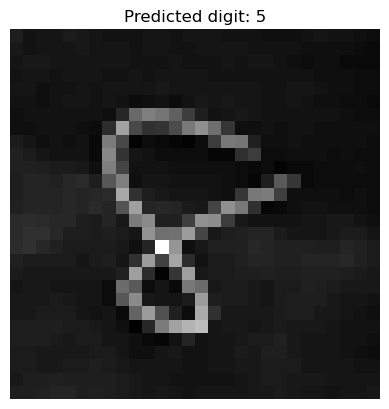

In [19]:
# Load the image you want to predict
img_path = '/Users/Marika/Data Sets/imgonline-com-ua-Negative-E6SvGUAcWJ4C.jpg'
img = Image.open(img_path).convert('L')  # Convert to grayscale

# Resize the image to 28x28 pixels (MNIST size)
img = img.resize((28, 28))

# Convert the image to a NumPy array
img_array = np.array(img)

# Normalize the image data to match the training set
img_array = img_array.astype('float32') / 255.0

# Reshape the image to match the model's expected input shape
img_array = img_array.reshape(1, 28, 28)  # Model expects (None, 28, 28)

# Predict the digit
predict_value = model.predict(img_array)
predicted_digit = np.argmax(predict_value)

# Display the image and prediction
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted digit: {predicted_digit}")
plt.axis('off')  # Hide axes
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


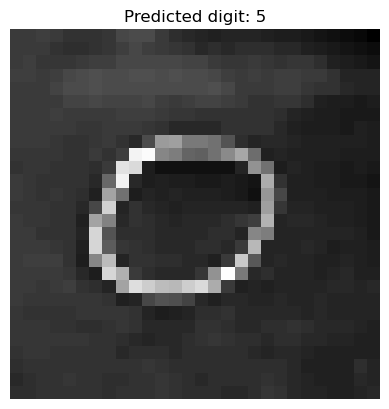

In [20]:
# Load the image you want to predict
img_path = '/Users/Marika/Data Sets/imgonline-com-ua-Negative-gucE6AGphBPJwCtO.jpg'
img = Image.open(img_path).convert('L')  # Convert to grayscale

# Resize the image to 28x28 pixels (MNIST size)
img = img.resize((28, 28))

# Convert the image to a NumPy array
img_array = np.array(img)

# Normalize the image data to match the training set
img_array = img_array.astype('float32') / 255.0

# Reshape the image to match the model's expected input shape
img_array = img_array.reshape(1, 28, 28)  # Model expects (None, 28, 28)

# Predict the digit
predict_value = model.predict(img_array)
predicted_digit = np.argmax(predict_value)

# Display the image and prediction
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted digit: {predicted_digit}")
plt.axis('off')  # Hide axes
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


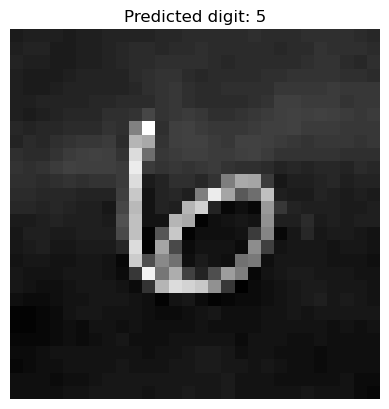

In [21]:
# Load the image you want to predict
img_path = '/Users/Marika/Data Sets/imgonline-com-ua-Negative-OW7WjbwUIPTqpk.jpg'
img = Image.open(img_path).convert('L')  # Convert to grayscale

# Resize the image to 28x28 pixels (MNIST size)
img = img.resize((28, 28))

# Convert the image to a NumPy array
img_array = np.array(img)

# Normalize the image data to match the training set
img_array = img_array.astype('float32') / 255.0

# Reshape the image to match the model's expected input shape
img_array = img_array.reshape(1, 28, 28)  # Model expects (None, 28, 28)

# Predict the digit
predict_value = model.predict(img_array)
predicted_digit = np.argmax(predict_value)

# Display the image and prediction
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted digit: {predicted_digit}")
plt.axis('off')  # Hide axes
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


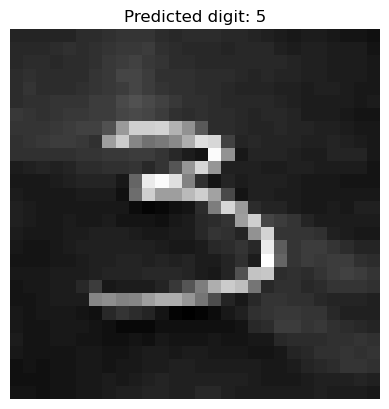

In [22]:
# Load the image you want to predict
img_path = '/Users/Marika/Data Sets/imgonline-com-ua-Negative-pypgZp6XU6FFh0i.jpg'
img = Image.open(img_path).convert('L')  # Convert to grayscale

# Resize the image to 28x28 pixels (MNIST size)
img = img.resize((28, 28))

# Convert the image to a NumPy array
img_array = np.array(img)

# Normalize the image data to match the training set
img_array = img_array.astype('float32') / 255.0

# Reshape the image to match the model's expected input shape
img_array = img_array.reshape(1, 28, 28)  # Model expects (None, 28, 28)

# Predict the digit
predict_value = model.predict(img_array)
predicted_digit = np.argmax(predict_value)

# Display the image and prediction
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted digit: {predicted_digit}")
plt.axis('off')  # Hide axes
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


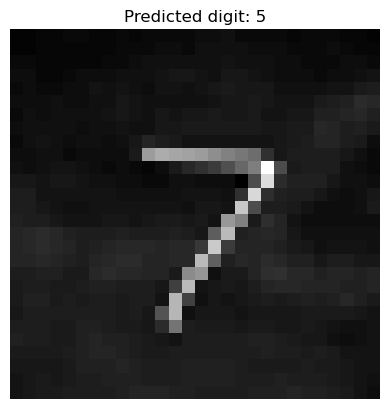

In [23]:
# Load the image you want to predict
img_path = '/Users/Marika/Data Sets/imgonline-com-ua-Negative-SckttkDvFXWsdJ.jpg'
img = Image.open(img_path).convert('L')  # Convert to grayscale

# Resize the image to 28x28 pixels (MNIST size)
img = img.resize((28, 28))

# Convert the image to a NumPy array
img_array = np.array(img)

# Normalize the image data to match the training set
img_array = img_array.astype('float32') / 255.0

# Reshape the image to match the model's expected input shape
img_array = img_array.reshape(1, 28, 28)  # Model expects (None, 28, 28)

# Predict the digit
predict_value = model.predict(img_array)
predicted_digit = np.argmax(predict_value)

# Display the image and prediction
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted digit: {predicted_digit}")
plt.axis('off')  # Hide axes
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


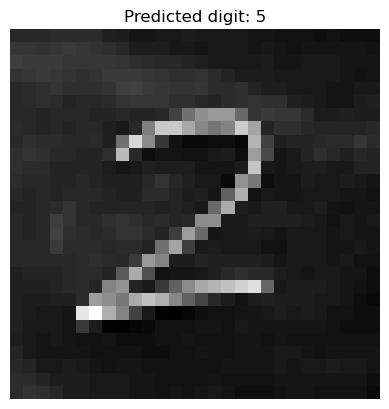

In [24]:
# Load the image you want to predict
img_path = '/Users/Marika/Data Sets/imgonline-com-ua-Negative-VEOgqcHqc9JXmX7R.jpg'
img = Image.open(img_path).convert('L')  # Convert to grayscale

# Resize the image to 28x28 pixels (MNIST size)
img = img.resize((28, 28))

# Convert the image to a NumPy array
img_array = np.array(img)

# Normalize the image data to match the training set
img_array = img_array.astype('float32') / 255.0

# Reshape the image to match the model's expected input shape
img_array = img_array.reshape(1, 28, 28)  # Model expects (None, 28, 28)

# Predict the digit
predict_value = model.predict(img_array)
predicted_digit = np.argmax(predict_value)

# Display the image and prediction
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted digit: {predicted_digit}")
plt.axis('off')  # Hide axes
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


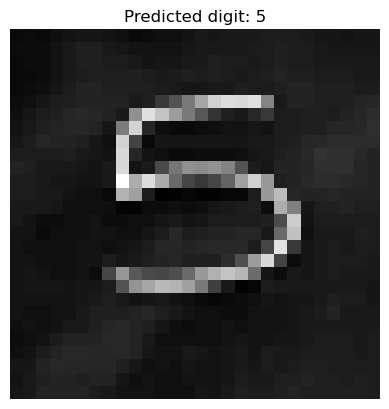

In [25]:
# Load the image you want to predict
img_path = '/Users/Marika/Data Sets/imgonline-com-ua-Negative-YOpRZvyshjM0OZQ.jpg'
img = Image.open(img_path).convert('L')  # Convert to grayscale

# Resize the image to 28x28 pixels (MNIST size)
img = img.resize((28, 28))

# Convert the image to a NumPy array
img_array = np.array(img)

# Normalize the image data to match the training set
img_array = img_array.astype('float32') / 255.0

# Reshape the image to match the model's expected input shape
img_array = img_array.reshape(1, 28, 28)  # Model expects (None, 28, 28)

# Predict the digit
predict_value = model.predict(img_array)
predicted_digit = np.argmax(predict_value)

# Display the image and prediction
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted digit: {predicted_digit}")
plt.axis('off')  # Hide axes
plt.show()